## A Study About Bank Marketing Campaign

<img src="https://www.bankingexchange.com/media/k2/items/cache/fee19e03161274aa1078094a420f1bda_M.jpg?t=1515612391" width="600" height="300"></img>
<br>
source: bankingexchange.com


# 1. Identify the problem
Marketing campaigns are organized, strategized efforts to promote a specific company goal, such as raising awareness of a new product or capturing customer feedback. They typically aim to reach consumers in a variety of ways and involve a combination of media, including but not limited to email, print advertising, television or radio advertising, pay-per-click, and social media.
(Credit: [hubspot](https://blog.hubspot.com/marketing/marketing-campaigns) )

## 1.1 Introduction

Prediction of Bank marketing campaign with the use of Machine Learning will really revolutionarize this segment because it will help in saving resources to attain maximum results in the form of profits.


## 1.2 Goals

In general, datasets which contain marketing data can be used for 2 different business goals:
<br>
1. Find the best strategies to improve for the next marketing campaign.
2. Finding out customer segments, using data for customers, who subscribed to term deposit. This helps to identify the profile of a customer, who is more likely to acquire the product and develop more targeted marketing campaigns.

## 1.3 Identify data sources
[kaggle](https://www.kaggle.com/janiobachmann/bank-marketing-dataset)

[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

**Import libraries**

In [ ]:
#import linear algebra and data manipulation libraries
import numpy as np
import pandas as pd

#import standard visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
#import machine learning

**import dataset**

In [ ]:
df = pd.read_csv("/content/drive/My Drive/data science/devine it/final project/bank-marketing.csv")

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [ ]:
df.nunique()

age            76
job            12
marital         3
education       4
default         2
balance      3805
housing         2
loan            2
contact         3
day            31
month          12
duration     1428
campaign       36
pdays         472
previous       34
poutcome        4
deposit         2
dtype: int64

### About the dataset:
The data set has 17 attributes or variables. They are:
- **age** (numeric)
- **job:** type of job
- **marital:** marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- **education:** (categorical:'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
- **default:** has credit in default? (categorical: 'no','yes','unknown')
- **balance:** it is a numerical column which indicate the client has how much outstanding balance in his account with the bank.
- **housing:** has housing loan? (categorical: 'no','yes','unknown')
- **loan:** has personal loan? (categorical: 'no','yes','unknown')
- **contact:** contact communication type (categorical: 'cellular','telephone')
- **month:** last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- **day:** last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
- **duration:** last contact duration, in seconds (numeric). Important note: this attribute highly affects the output
- **campaign:** number of contacts performed during this campaign and for this client (numeric, includes last contact)
- **pdays:** number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- **previous:** number of contacts performed before this campaign and for this client (numeric)
- **poutcome:** outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
- **deposit:** has the client subscribed a term deposit? (binary: 'yes','no')

The target attribute '**deposit**' is need to be predicted with help of other attributes. The 'deposit' attribute has two level 'yes' and 'no',(whether the customer will make deposit or not).

# 2-Exploratory Data Analysis

#### Find total rows


In [ ]:
print("Bank marketing dataset consists of {rows} rows.".format(rows = len(df)))

Bank marketing dataset consists of 11162 rows.


#### Find missing values 

In [ ]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

##### **Observation**
> So we see that there are no missing values.

#### Find data types

In [ ]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

#### Categorical columns exploration

In the dataset we have both categorical and numerical columns. Let's look at the values of categorical columns first.

In [ ]:
categorical_features=[feature for feature in df.columns if ((df[feature].dtypes=='O') & (feature not in ['deposit']))]
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

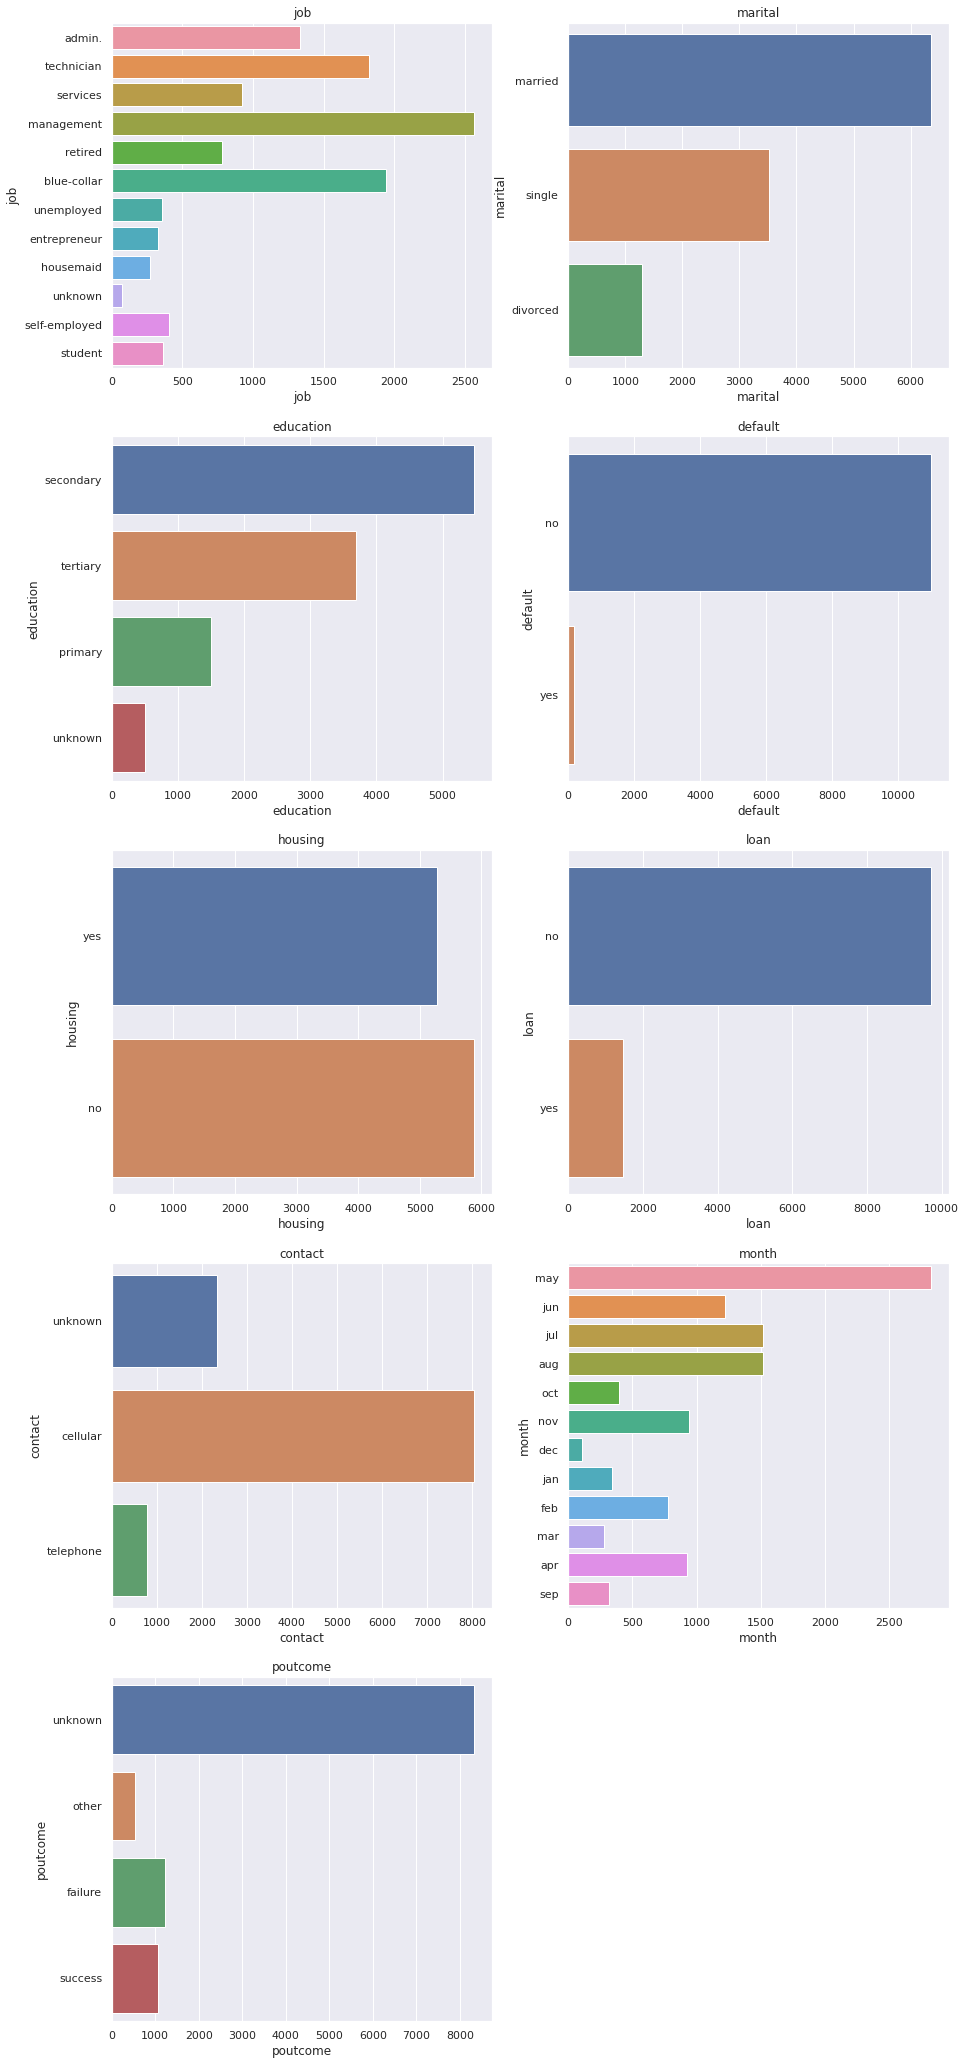

In [ ]:
#check count based on categorical columns
plt.figure(figsize=(15,90), facecolor='white')
plt.title('check count based on categorical columns')
plotnumber =1
for categorical_feature in categorical_features:
    ax = plt.subplot(12,2,plotnumber)
    sns.countplot(y=categorical_feature,data=df)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

##### **Observation**

- client with job type as management records are high in given dataset and housemaid are very less
- client who married are high in records in given dataset and divorced are less
- client whoes education background is secondary are in high numbers in given dataset
- defualt feature seems to be does not play importand role as it has value of no at high ratio to value yes which can drop
- data in month of may is high and less in december.

### Numerical columns exploration

Now let's look at the numerical columns' values.

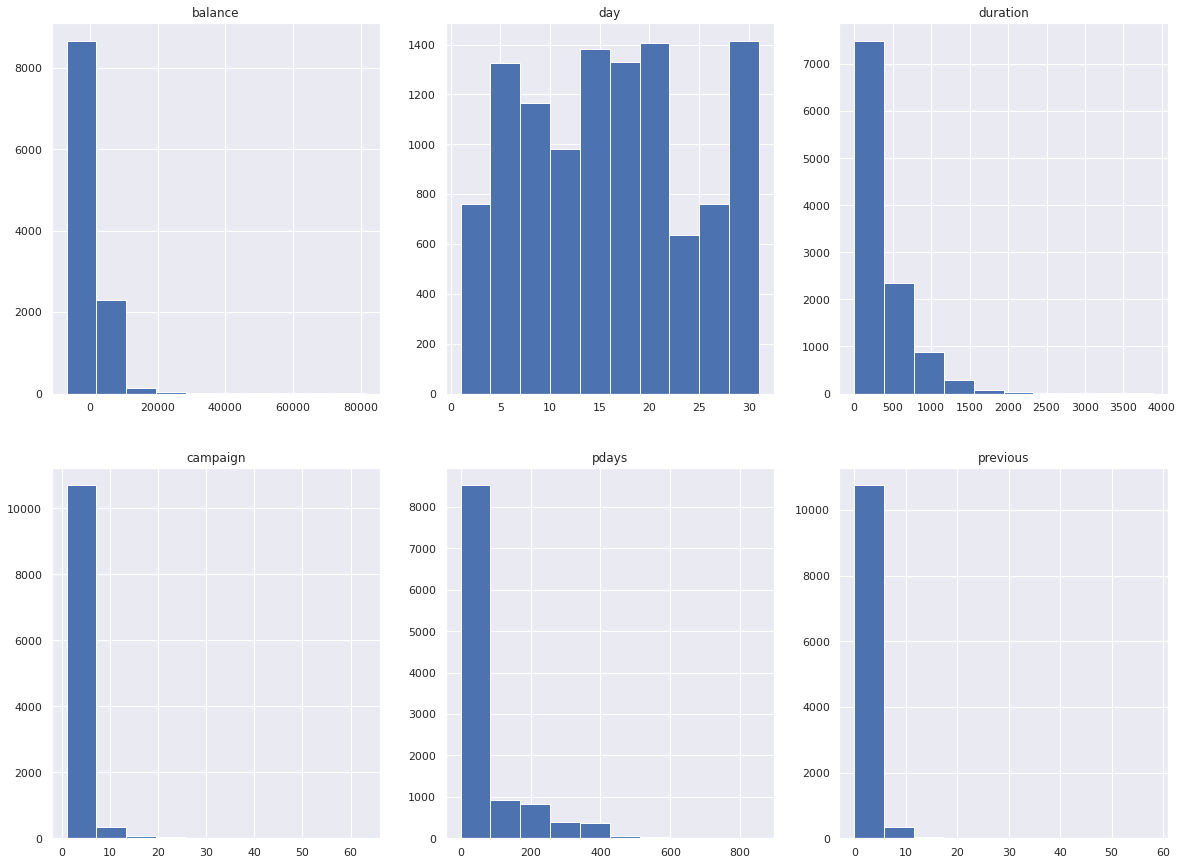

In [ ]:
num_columns = ['balance', 'day','duration', 'campaign', 'pdays', 'previous']

fig, axs = plt.subplots(2, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for num_column in num_columns:
    
    trace_x = counter // 3
    trace_y = counter % 3
    
    axs[trace_x, trace_y].hist(df[num_column])
    
    axs[trace_x, trace_y].set_title(num_column)
    
    counter += 1

plt.show()

### categorical_features and deposite

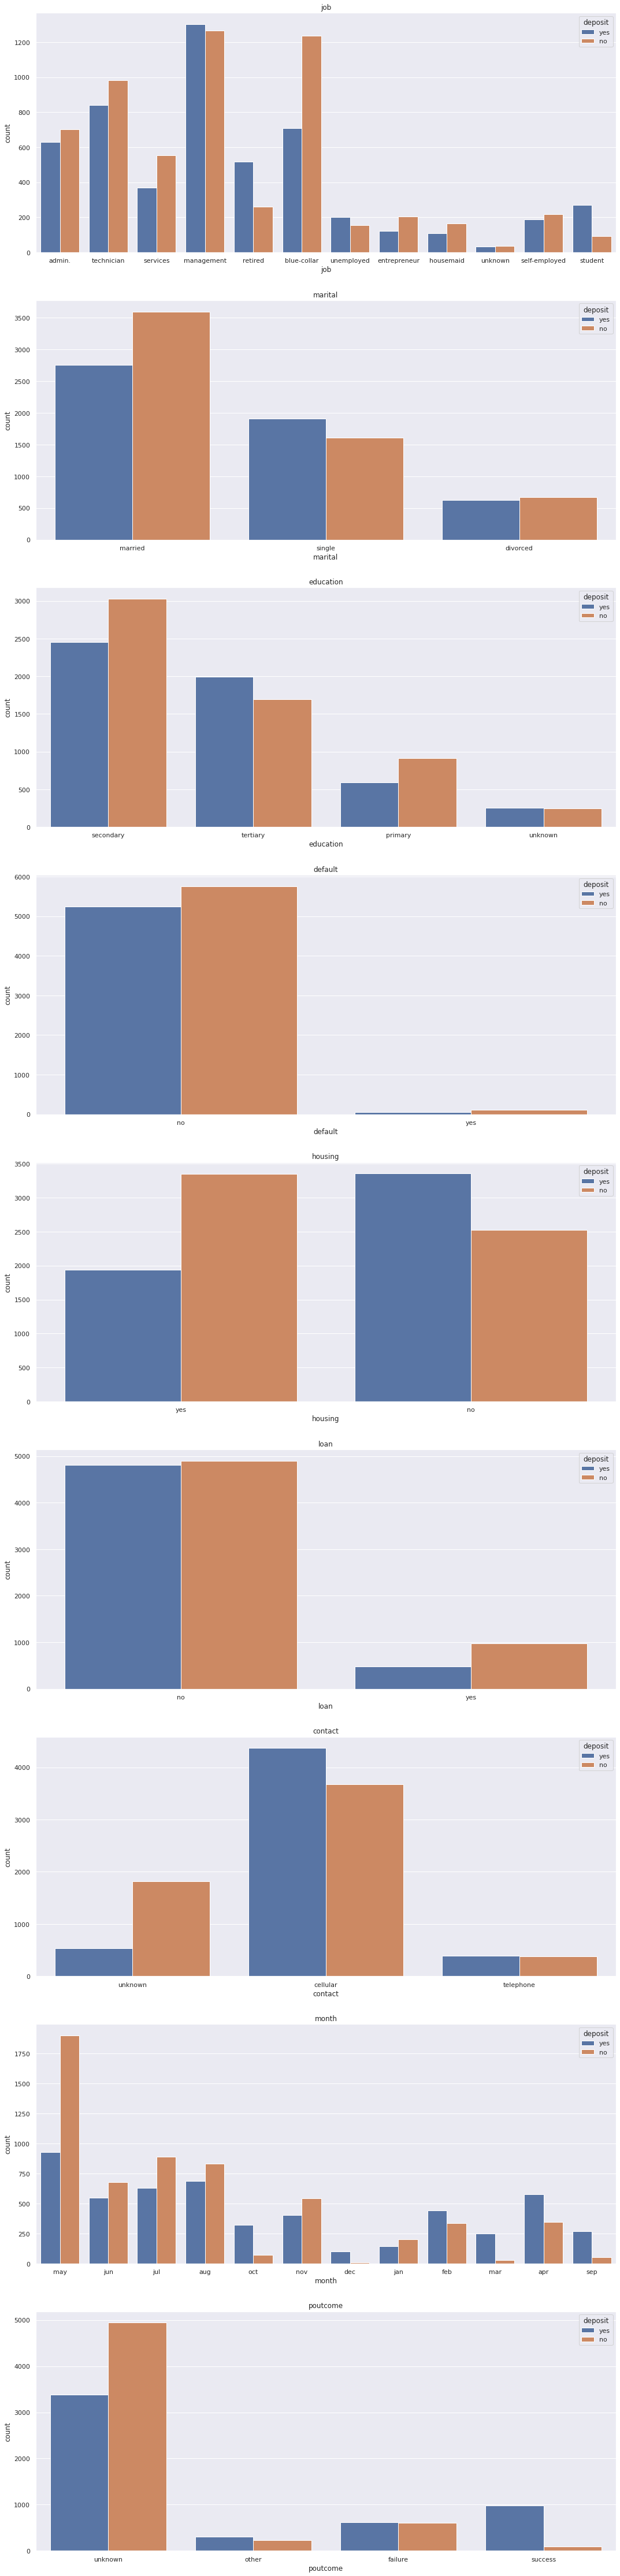

In [ ]:
plt.figure(figsize=(18,90), facecolor='white')
plotnumber =1
for categorical_feature in categorical_features:
    ax = plt.subplot(10,1,plotnumber)
    sns.countplot(x=categorical_feature,hue="deposit",data=df)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

##### **Observation**

- retired client has high interest on deposit
- client who has housing loan seems to be not interested much on deposit
- if pre campagin outcome that is poutcome=success then, there is high chance of client to show interest on deposit
- in month of March, September, October and December, client show high interest to deposit
- in month of may, records are high but client interst ratio is very less

### Explore the Numerical Features

list of numerical features

In [ ]:
numerical_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O') & (feature not in ['deposit']))]
print('Total number of numerical features: ', len(numerical_features))

Total number of numerical features:  7


In [ ]:
df[numerical_features].head()

,age,balance,day,duration,campaign,pdays,previous
0,59,2343,5,1042,1,-1,0
1,56,45,5,1467,1,-1,0
2,41,1270,5,1389,1,-1,0
3,55,2476,5,579,1,-1,0
4,54,184,5,673,2,-1,0


### Find Discrete Numerical Features

In [ ]:
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 0


##### **Observation**
> there is no Discrete Variables in give dataset

### Find Continous Numerical Features

In [ ]:
continuous_features=[feature for feature in numerical_features if feature not in discrete_feature+['deposit']]
print("Continuous feature Count: {}".format(len(continuous_features)))

Continuous feature Count: 7


##### **Observation**
> there are 7 continuous numerical features

### Distribution of Continous Numerical Features

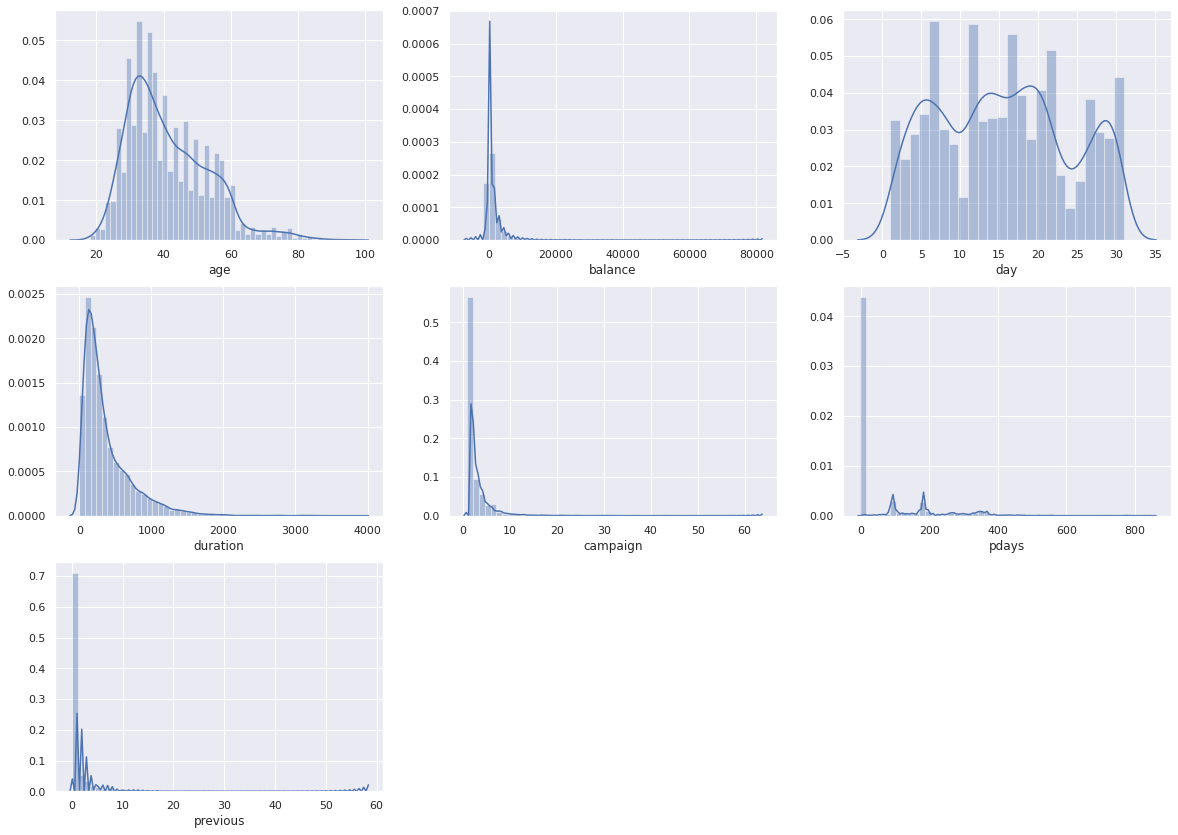

In [ ]:
#plot a univariate distribution of continues observations
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for continuous_feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(df[continuous_feature])
    plt.xlabel(continuous_feature)
    plotnumber+=1
plt.show()

##### **Observation**
- it seems age, days distributed normally
- balance, duration, compaign, pdays and previous heavely skewed towards left and seems to be have some outliers.

### Relation between Continous numerical Features and Labels

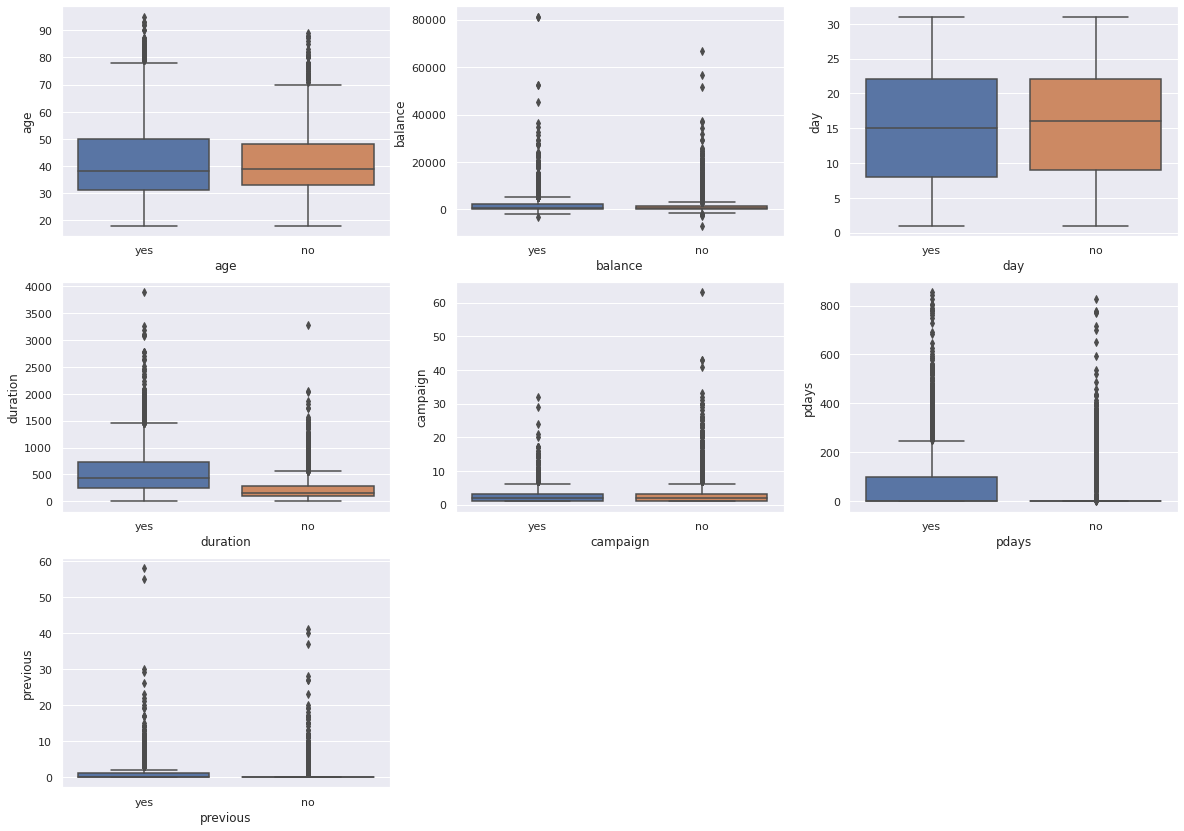

In [ ]:
#boxplot to show target distribution with respect numerical features
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x="deposit", y= df[feature], data=df)
    plt.xlabel(feature)
    plotnumber+=1
plt.show()

##### **Observation**
> client shows interest on deposit who had discussion for longer duration

### Find Outliers in numerical features

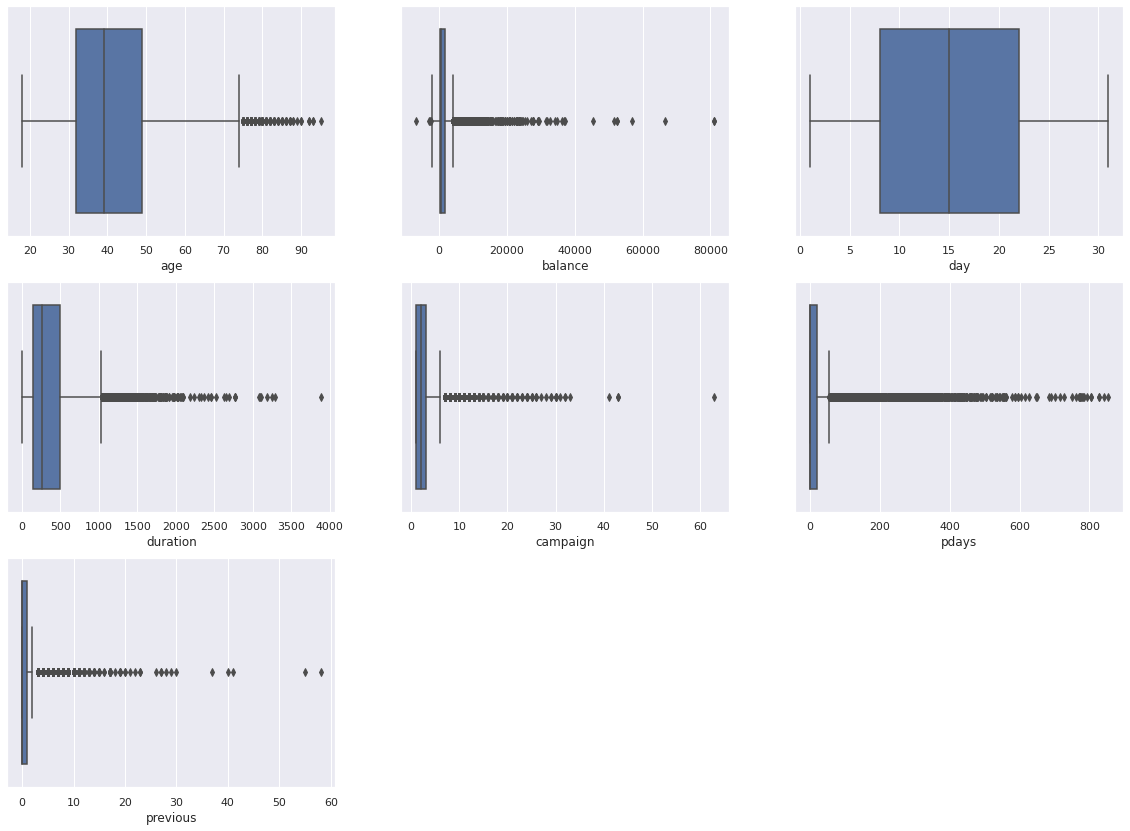

In [ ]:
#boxplot on numerical features to find outliers
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(df[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

##### **Observation**

> age, balance, duration, compaign, pdays and previous has some outliers

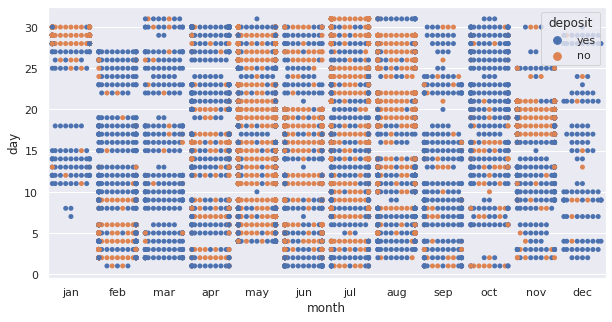

In [ ]:
plt.figure(figsize=(10,5))
sns.swarmplot(x="month",y="day",hue="deposit",data=df,order=("jan","feb","mar","apr","may","jun","jul","aug","sep","oct","nov","dec"))
plt.show()

##### **Observation**

- That's great view. I think day and month are important attributes.
- Potential clients opted to suscribe term deposits during the seasons of fall and winter. The next marketing campaign should focus its activity throghout these seasons.

### COMPARING ALL FEATURES AGAINST DEPOSIT

Since 'deposit' column is our response variable, we will now comapare its values with all other feature variables. Further the values in the 'deposit' columns will be looked into as 'yes' and 'no'.

In [ ]:
# DEPOSIT VALUE COUNTS
df_deposit = df['deposit'].value_counts()
df_deposit

no     5873
yes    5289
Name: deposit, dtype: int64

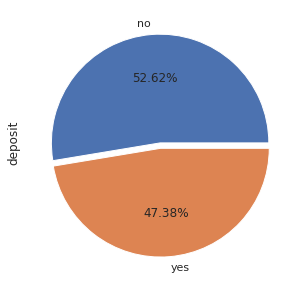

In [ ]:
# NUMBER OF DEPOSITS
plt.figure(figsize=(11,5))

df['deposit'].value_counts().plot.pie(explode=[0,0.05],autopct='%1.2f%%')
shadow=True

plt.show()

### Is this a kind of imbalanced dataset?

>Well, the graph below shows us that this is not a imbalanced dataset. Both classes has similar proportion.

## Data preprocessing

### Converting categorical to numerical features

In [ ]:
numerical = df[['age','balance','day','duration','campaign','pdays','previous']]
categorical = df[['job','marital','education','housing','contact','month','poutcome','default','loan','deposit']]

In [ ]:
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()

In [ ]:
cat_encode = categorical.apply(lab.fit_transform)
cat_encode

,job,marital,education,housing,contact,month,poutcome,default,loan,deposit
0,0,1,1,1,2,8,3,0,0,1
1,0,1,1,0,2,8,3,0,0,1
2,9,1,1,1,2,8,3,0,0,1
3,7,1,1,1,2,8,3,0,0,1
4,0,1,2,0,2,8,3,0,0,1
...,...,...,...,...,...,...,...,...,...,...
11157,1,2,0,1,0,0,3,0,0,0
11158,7,1,1,0,2,6,3,0,0,0
11159,9,2,1,0,0,1,3,0,0,0
11160,9,1,1,0,0,8,0,0,1,0


Let's Join **numerical** and **categorical** part into a dataframe

In [ ]:
data = numerical.join(cat_encode)
data.head()

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,housing,contact,month,poutcome,default,loan,deposit
0,59,2343,5,1042,1,-1,0,0,1,1,1,2,8,3,0,0,1
1,56,45,5,1467,1,-1,0,0,1,1,0,2,8,3,0,0,1
2,41,1270,5,1389,1,-1,0,9,1,1,1,2,8,3,0,0,1
3,55,2476,5,579,1,-1,0,7,1,1,1,2,8,3,0,0,1
4,54,184,5,673,2,-1,0,0,1,2,0,2,8,3,0,0,1


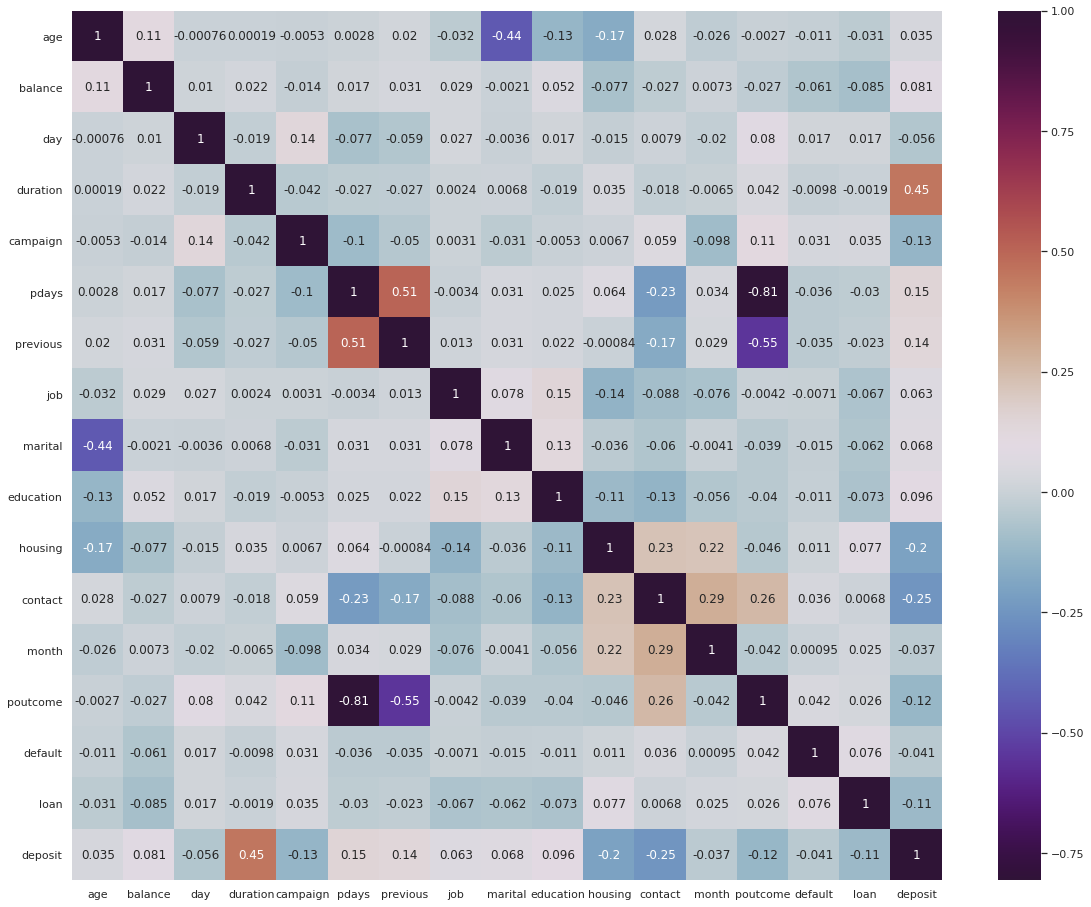

In [ ]:
# CORRELATION BETWEEN THE ATTRIBUTES 
plt.figure(figsize=(20,16))

sns.heatmap(data.corr(),square=True,annot=True,cmap='twilight_shifted')

### Split Dataset into Training set and Test set

In [ ]:
X = data.drop(['deposit'],axis=1)
y = data['deposit']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [ ]:
len(X_train)

8929

In [ ]:
len(X_test)

2233

## Normalization

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_train)

### Model Selection

In [ ]:
# Time for Classification Models
import time


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


dict_classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Nearest Neighbors": KNeighborsClassifier(),
    "Linear SVM": SVC(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "Decision Tree": tree.DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=18),
    "Neural Net": MLPClassifier(alpha=1),
    "Naive Bayes": GaussianNB()
}

In [ ]:
#  Thanks to Ahspinar for the function. 
no_classifiers = len(dict_classifiers.keys())

def batch_classify(X_train, y_train, verbose = True,max_iter=100):
    df_results = pd.DataFrame(data=np.zeros(shape=(no_classifiers,3)), columns = ['classifier', 'train_score', 'training_time'])
    count = 0
    for key, classifier in dict_classifiers.items():
        t_start = time.clock()
        classifier.fit(X_train, y_train)
        t_end = time.clock()
        t_diff = t_end - t_start
        train_score = classifier.score(X_train, y_train)
        df_results.loc[count,'classifier'] = key
        df_results.loc[count,'train_score'] = train_score
        df_results.loc[count,'training_time'] = t_diff
        if verbose:
            print("trained {c} in {f:.2f} s".format(c=key, f=t_diff))
        count+=1
    return df_results

In [ ]:
df_results = batch_classify(X_train, y_train,max_iter=100)
print(df_results.sort_values(by='train_score', ascending=False))

trained Logistic Regression in 0.05 s
trained Nearest Neighbors in 0.12 s
trained Linear SVM in 2.75 s
trained Gradient Boosting Classifier in 1.38 s
trained Decision Tree in 0.06 s
trained Random Forest in 0.22 s
trained Neural Net in 9.07 s
trained Naive Bayes in 0.01 s
                     classifier  train_score  training_time
4                 Decision Tree     1.000000       0.060580
5                 Random Forest     0.997760       0.215610
3  Gradient Boosting Classifier     0.860791       1.381141
2                    Linear SVM     0.845335       2.747140
1             Nearest Neighbors     0.844775       0.115569
6                    Neural Net     0.827304       9.073370
0           Logistic Regression     0.797738       0.045858
7                   Naive Bayes     0.753612       0.010165


**Avoiding Overfitting:**
<br>
Brief Description of Overfitting?
This is an error in the modeling algorithm that takes into consideration random noise in the fitting process rather than the pattern itself. You can see that this occurs when the model gets an awsome score in the training set but when we use the test set (Unknown data for the model) we get an awful score. This is likely to happen because of overfitting of the data (taking into consideration random noise in our pattern). What we want our model to do is to take the overall pattern of the data in order to correctly classify whether a potential client will suscribe to a term deposit or not. In the examples above, it is most likely that the *Decision Tree* Classifier and *Random Forest* classifiers are overfitting since they both give us nearly perfect scores (100% and 99%) accuracy scores.


**How can we avoid Overfitting?**

The best alternative to avoid overfitting is to use cross validation. Taking the training test and splitting it. For instance, if we split it by 3, 2/3 of the data or 66% will be used for training and 1/3 33% will be used or testing and we will do the testing process three times. This algorithm will iterate through all the training and test sets and the main purpose of this is to grab the overall pattern of the data.

In [ ]:
# Use Cross-validation.
from sklearn.model_selection import cross_val_score

In [ ]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=100)
log_scores = cross_val_score(log_reg, X_train, y_train, cv=3)
log_reg_mean = log_scores.mean()

In [ ]:
# Logistic Regression
log_reg = LogisticRegression()
log_scores = cross_val_score(log_reg, X_train, y_train, cv=3)
log_reg_mean = log_scores.mean()

# SVC
svc_clf = SVC()
svc_scores = cross_val_score(svc_clf, X_train, y_train, cv=3)
svc_mean = svc_scores.mean()

# KNearestNeighbors
knn_clf = KNeighborsClassifier()
knn_scores = cross_val_score(knn_clf, X_train, y_train, cv=3)
knn_mean = knn_scores.mean()

# Decision Tree
tree_clf = tree.DecisionTreeClassifier()
tree_scores = cross_val_score(tree_clf, X_train, y_train, cv=3)
tree_mean = tree_scores.mean()

# Gradient Boosting Classifier
grad_clf = GradientBoostingClassifier()
grad_scores = cross_val_score(grad_clf, X_train, y_train, cv=3)
grad_mean = grad_scores.mean()

# Random Forest Classifier
rand_clf = RandomForestClassifier(n_estimators=18)
rand_scores = cross_val_score(rand_clf, X_train, y_train, cv=3)
rand_mean = rand_scores.mean()

# NeuralNet Classifier
neural_clf = MLPClassifier(alpha=1)
neural_scores = cross_val_score(neural_clf, X_train, y_train, cv=3)
neural_mean = neural_scores.mean()

# Naives Bayes
nav_clf = GaussianNB()
nav_scores = cross_val_score(nav_clf, X_train, y_train, cv=3)
nav_mean = neural_scores.mean()

# Create a Dataframe with the results.
d = {'Classifiers': ['Logistic Reg.', 'SVC', 'KNN', 'Dec Tree', 'Grad B CLF', 'Rand FC', 'Neural Classifier', 'Naives Bayes'], 
    'Crossval Mean Scores': [log_reg_mean, svc_mean, knn_mean, tree_mean, grad_mean, rand_mean, neural_mean, nav_mean]}

result_df = pd.DataFrame(data=d)

In [ ]:
# All our models perform well but I will go with GradientBoosting.
result_df = result_df.sort_values(by=['Crossval Mean Scores'], ascending=False)
result_df

,Classifiers,Crossval Mean Scores
4,Grad B CLF,0.845336
5,Rand FC,0.836488
6,Neural Classifier,0.817113
7,Naives Bayes,0.817113
1,SVC,0.816777
0,Logistic Reg.,0.794154
3,Dec Tree,0.775675
2,KNN,0.771979


### Confusion Matrix:

<img src="https://computersciencesource.files.wordpress.com/2010/01/conmat.png">

**Insights of a Confusion Matrix:**

The main purpose of a confusion matrix is to see how our model is performing when it comes to classifying potential clients that are likely to suscribe to a term deposit. We will see in the confusion matrix four terms the True Positives, False Positives, True Negatives and False Negatives.


***Positive/Negative:*** Type of Class (label) ["No", "Yes"] True/False: Correctly or Incorrectly classified by the model.


***True Negatives (Top-Left Square):*** This is the number of correctly classifications of the "No" class or potenial clients that are not willing to suscribe a term deposit.


***False Negatives (Top-Right Square):*** This is the number of incorrectly classifications of the "No" class or potential clients that are not willing to suscribe a term depositt.


***False Positives (Bottom-Left Square):*** This is the number of incorrectly classifications of the "Yes" class or potential clients that are willing to suscribe a term deposit.


***True Positives (Bottom-Right Square):*** This is the number of correctly classifications of the "Yes" class or potenial clients that are willing to suscribe a term deposit.

In [ ]:
# Cross validate our Gradient Boosting Classifier
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(grad_clf, X_train, y_train, cv=3)

In [ ]:
from sklearn.metrics import accuracy_score
grad_clf.fit(X_train, y_train)
print ("Gradient Boost Classifier accuracy is %2.2f" % accuracy_score(y_train, y_train_pred))

Gradient Boost Classifier accuracy is 0.85


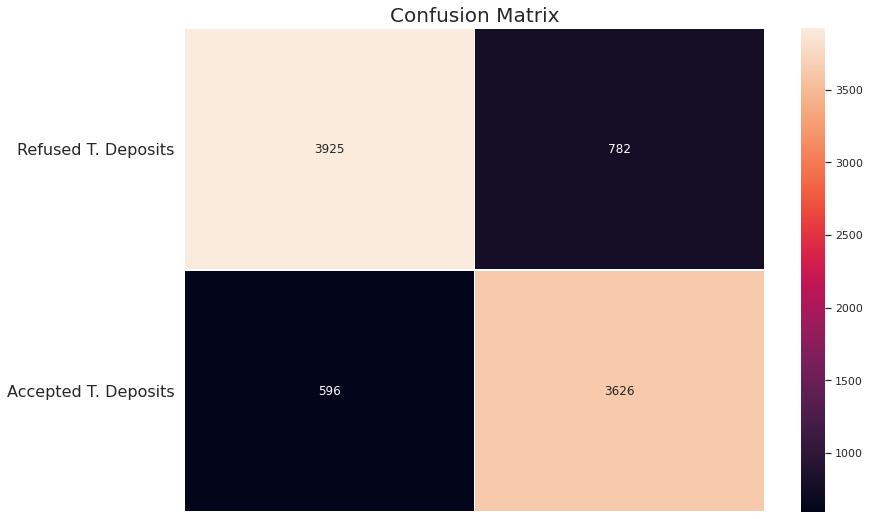

In [ ]:
from sklearn.metrics import confusion_matrix
# 4697: no's, 4232: yes
conf_matrix = confusion_matrix(y_train, y_train_pred)
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=.5, ax=ax)
plt.title("Confusion Matrix", fontsize=20)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
ax.set_yticks(np.arange(conf_matrix.shape[0]) + 0.5, minor=False)
ax.set_xticklabels("")
ax.set_yticklabels(['Refused T. Deposits', 'Accepted T. Deposits'], fontsize=16, rotation=360)
plt.show()

Feature Ranking

In [ ]:
# define the model
model = RandomForestClassifier()
# fit the model
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.08312
Feature: 1, Score: 0.08704
Feature: 2, Score: 0.07169
Feature: 3, Score: 0.37676
Feature: 4, Score: 0.03435
Feature: 5, Score: 0.04360
Feature: 6, Score: 0.02508
Feature: 7, Score: 0.03807
Feature: 8, Score: 0.01793
Feature: 9, Score: 0.02239
Feature: 10, Score: 0.03006
Feature: 11, Score: 0.04369
Feature: 12, Score: 0.08072
Feature: 13, Score: 0.03443
Feature: 14, Score: 0.00131
Feature: 15, Score: 0.00976


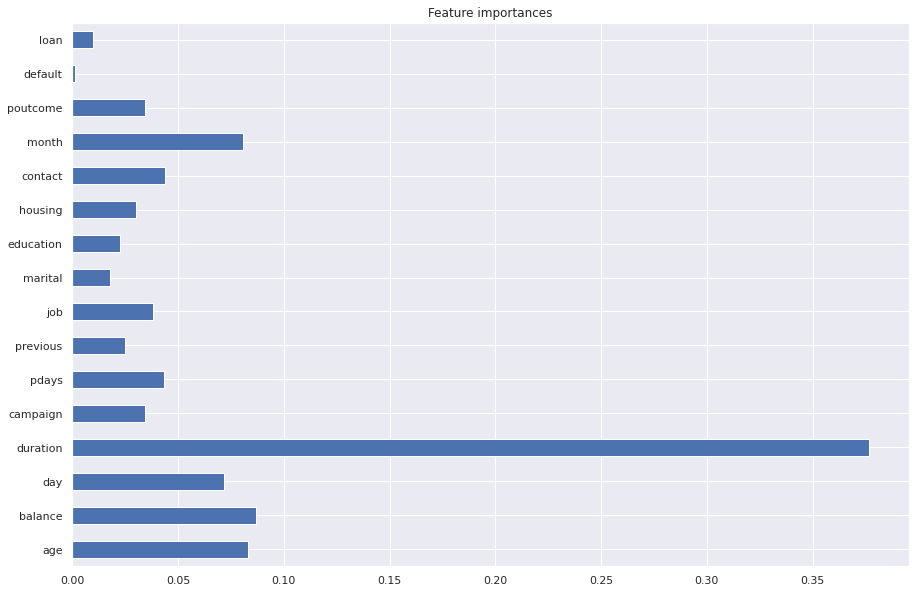

In [ ]:
# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
# (pd.Series(importance, index=X_train.columns).nlargest(4).plot(kind='barh'))
(pd.Series(importance, index=X.columns).plot(kind='barh',figsize=(15,10)))

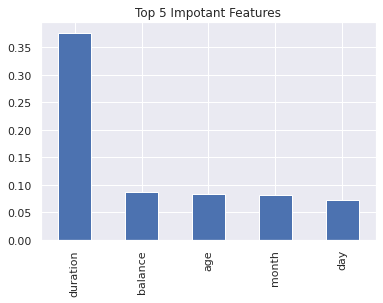

In [ ]:
plt.title("Top 5 Impotant Features")
(pd.Series(importance, index=X.columns).nlargest(5).plot(kind='bar'))

### What Actions should the Bank Consider?


<img src="https://media.giphy.com/media/l46Cy1rHbQ92uuLXa/giphy.gif" width="400" height="300"></img>

#### Solutions for the Next Marketing Campaign (Conclusion):

1) ***Months of Marketing Activity:*** We saw that the the month of highest level of marketing activity was the month of May. However, this was the month that potential clients tended to reject term deposits offers (Lowest effective rate: -34.49%). For the next marketing campaign, it will be wise for the bank to focus the marketing campaign during the months of March, September, October and December. (December should be under consideration because it was the month with the lowest marketing activity, there might be a reason why december is the lowest.)

2) ***Seasonality:*** Potential clients opted to suscribe term deposits during the seasons of fall and winter. The next marketing campaign should focus its activity throghout these seasons.

3) ***Campaign Calls:*** A policy should be implemented that states that no more than 3 calls should be applied to the same potential client in order to save time and effort in getting new potential clients. Remember, the more we call the same potential client, the likely he or she will decline to open a term deposit.

4) ***Age Category:*** The next marketing campaign of the bank should target potential clients in their 20s or younger and 60s or older. The youngest category had a 60% chance of suscribing to a term deposit while the eldest category had a 76% chance of suscribing to a term deposit. It will be great if for the next campaign the bank addressed these two categories and therefore, increase the likelihood of more term deposits suscriptions.

5) ***Occupation:*** Not surprisingly, potential clients that were students or retired were the most likely to suscribe to a term deposit. Retired individuals, tend to have more term deposits in order to gain some cash through interest payments. Remember, term deposits are short-term loans in which the individual (in this case the retired person) agrees not to withdraw the cash from the bank until a certain date agreed between the individual and the financial institution. After that time the individual gets its capital back and its interest made on the loan. Retired individuals tend to not spend bigly its cash so they are morelikely to put their cash to work by lending it to the financial institution. Students were the other group that used to suscribe term deposits.

6) ***House Loans and Balances:*** Potential clients in the low balance and no balance category were more likely to have a house loan than people in the average and high balance category. What does it mean to have a house loan? This means that the potential client has financial compromises to pay back its house loan and thus, there is no cash for he or she to suscribe to a term deposit account. However, we see that potential clients in the average and hih balances are less likely to have a house loan and therefore, more likely to open a term deposit. Lastly, the next marketing campaign should focus on individuals of average and high balances in order to increase the likelihood of suscribing to a term deposit.


7) ***Develop a Questionaire during the Calls:*** Since duration of the call is the feature that most positively correlates with whether a potential client will open a term deposit or not, by providing an interesting questionaire for potential clients during the calls the conversation length might increase. Of course, this does not assure us that the potential client will suscribe to a term deposit! Nevertheless, we don't loose anything by implementing a strategy that will increase the level of engagement of the potential client leading to an increase probability of suscribing to a term deposit, and therefore an increase in effectiveness for the next marketing campaign the bank will excecute.


8) ***Target individuals with a higher duration (above 375):*** Target the target group that is above average in duration, there is a highly likelihood that this target group would open a term deposit account. The likelihood that this group would open a term deposit account is at 78% which is pretty high. This would allow that the success rate of the next marketing campaign would be highly successful.


By combining all these strategies and simplifying the market audience the next campaign should address, it is likely that the next marketing campaign of the bank will be more effective than the current one.